In [9]:
import networkx as nx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx
from dimod import ExactSolver

num_repeats = 10
shots = 1000

def min_set_max_cut(G,num_shots = 100,verbose = False, exact_solver = False):
    G.add_edges_from([(u, v, {'sign': 1}) for u, v in G.edges]) # Set the positive relationship for all the edges
    if exact_solver:
        sampler = ExactSolver()
        max_cut = dnx.maximum_cut(G, sampler)
    else:
        sampler = EmbeddingComposite(DWaveSampler())
        max_cut = dnx.maximum_cut(G, sampler, num_reads=num_shots) 
    
    #print(len(max_cut))
    max_cut_complementary = []
    for node in G.nodes:
        if node not in max_cut:
            max_cut_complementary.append(node)
            G.nodes[node]['color'] = 0
        else:
            G.nodes[node]['color'] = 1
    if verbose:
        print("Len of Max-Cut:", len(max_cut), max_cut)
        print("Len of Complementary Max-Cut:", len(max_cut_complementary), max_cut_complementary)
    
    if len(max_cut) < len(max_cut_complementary):
        return len(max_cut)
    else:
        return len(max_cut_complementary)
    
def get_most_probable(results_series):
    results_map = {}
    for res in results_series:
        if res in results_map:
            results_map[res] += 1
        else:
            results_map[res] = 1
    most_probable_key = None
    number_of_hits = None
    for k,v in results_map.items():
        if most_probable_key is None:
            most_probable_key = k
            number_of_hits = v
        elif v > number_of_hits:
            most_probable_key = k
            number_of_hits = v
        elif v == number_of_hits and k < most_probable_key:
            most_probable_key = k
            number_of_hits = v
    
    return most_probable_key, number_of_hits           
    

    

/Users/zarbo/.virtualenvs/quantum_computing/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


DWave Sampler most probable minimum set: 6


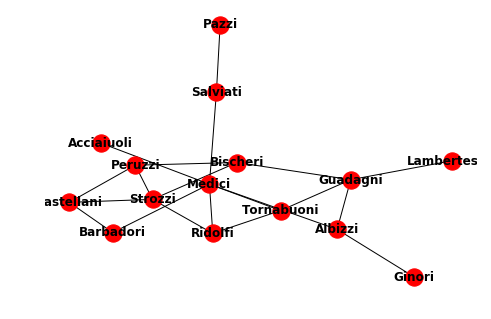

In [10]:
# Florentine Families Graph
florentine_dwave_samples = []
florentine_families = nx.florentine_families_graph() 
nx.draw(florentine_families, with_labels=True, font_weight='bold')
for _ in range(num_repeats):
    florentine_dwave_samples.append(min_set_max_cut(G=florentine_families, num_shots=shots,verbose=False, exact_solver= False))

most_probable, _ = get_most_probable(florentine_dwave_samples)
print('DWave Sampler most probable minimum set:', most_probable)
#print('Exact Solver minimum set:', min_set_max_cut(G=florentine_families, verbose=False, exact_solver= True))



DWave Sampler most probable minimum set: 11


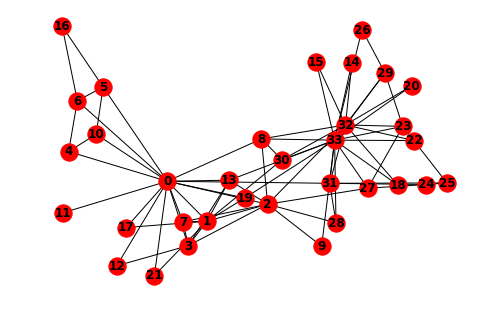

In [11]:
# Karate Club Graph
karate_dwave_samples = []
karate_club = nx.karate_club_graph() 
nx.draw(karate_club, with_labels=True, font_weight='bold')
for _ in range(num_repeats):
    karate_dwave_samples.append(min_set_max_cut(G=karate_club, num_shots=shots, verbose=False, exact_solver = False))

most_probable, _ = get_most_probable(karate_dwave_samples)
print('DWave Sampler most probable minimum set:', most_probable)
#print('Exact Solver minimum set:', min_set_max_cut(G=karate_club, verbose=False, exact_solver= True))

DWave Sampler most probable minimum set: 14


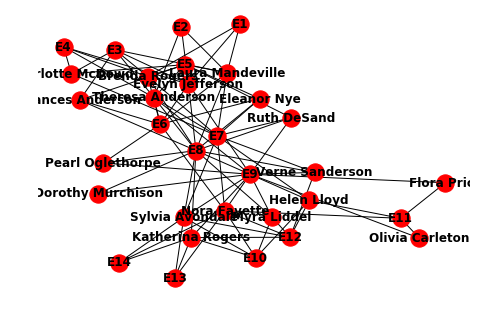

In [12]:
# Davis Southern Women Club Graph
davis_dwave_samples = []
davis_southern_women = nx.davis_southern_women_graph() 
nx.draw(davis_southern_women, with_labels=True, font_weight='bold')
for _ in range(num_repeats):
    davis_dwave_samples.append(min_set_max_cut(G=davis_southern_women, num_shots=shots,verbose=False, exact_solver = False))

most_probable, _ = get_most_probable(davis_dwave_samples)
print('DWave Sampler most probable minimum set:', most_probable)
#print('Exact Solver minimum set:', min_set_max_cut(G=davis_southern_women, verbose=False, exact_solver= True))
